# DSC 630 

### Course Project

**Author:** Kimberly Cable<br>
**Term:** Fall, 2022

## Preliminary Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Read datasets
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
geoloc_df = pd.read_csv("data/olist_geolocation_dataset.csv")
orderitems_df = pd.read_csv("data/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("data/olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
catname_df = pd.read_csv("data/product_category_name_translation.csv")

### Customers

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Change Zip code to string
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].apply(str)

In [6]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There are no empty values in the columns

In [7]:
# See how many states the customers come from
customers_per_state = customers_df['customer_state'].value_counts()

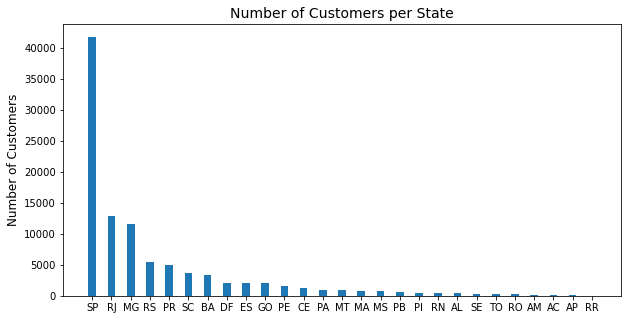

In [8]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(customers_per_state.keys(), customers_per_state.values, width = 0.4)
 
plt.xlabel("")
plt.ylabel("Number of Customers", fontsize = 12)
plt.title("Number of Customers per State", fontsize = 14)

plt.show()

It looks like all customers are in Brazil so we wont need the Geolocation dataset

### Orders

In [9]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
# Print rows that have empty delivered customer dates
rslt_orders_df = orders_df[orders_df['order_delivered_customer_date'].isnull()]
rslt_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


Customers with empty order delivered carrier dates and delivered customers dates are fine as the orders have not shipped

In [13]:
# Print rows that have empty approved at dates
rslt_orders_df = orders_df[orders_df['order_approved_at'].isnull()]
rslt_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00


Customers with approved at dates that are empty are cancelled orders. It looks like these orders have very long estimated delivery dates. I will need to look to see if there are reviews for these orders as the long delivery dates may play a role in the review score.

In [14]:
# Convert date columns to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [15]:
# Create dataset for delivered orders to check on delivery dates
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [16]:
# Create new feature for Estimated Delivery date - Delivered Customer Date to get difference in days
delivered_orders['delivery_days_diff'] = (delivered_orders['order_estimated_delivery_date'] - 
                                          delivered_orders['order_delivered_customer_date']).dt.days
delivered_orders.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21172\2578355309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_days_diff'] = (delivered_orders['order_estimated_delivery_date'] -


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days_diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0


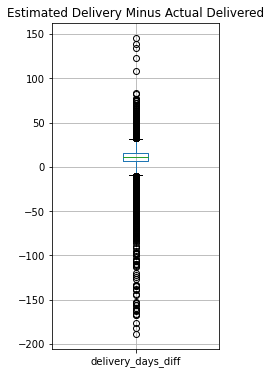

In [17]:
fig = plt.figure(figsize =(3, 6))

delivered_orders.boxplot(column = 'delivery_days_diff')

plt.title('Estimated Delivery Minus Actual Delivered')

plt.show()

In [18]:
delivered_orders['delivery_days_diff'].describe()

count    96470.000000
mean        10.875889
std         10.182105
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: delivery_days_diff, dtype: float64

The difference between the mean and the max and min are very large. It may be because of the canceled orders but before I remove Id like to see about the reviews.

In [19]:
# Create new feature for Order Purchase Date - Delivered Customer Date to get difference in days
delivered_orders['order_delivery_days_diff'] = (delivered_orders['order_purchase_timestamp'] - 
                                                delivered_orders['order_delivered_customer_date']).dt.days

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21172\1896983091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['order_delivery_days_diff'] = (delivered_orders['order_purchase_timestamp'] -


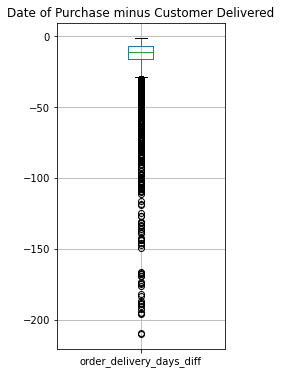

In [20]:
fig = plt.figure(figsize =(3, 6))

delivered_orders.boxplot(column = 'order_delivery_days_diff')

plt.title('Date of Purchase minus Customer Delivered')

plt.show()

In [21]:
delivered_orders['order_delivery_days_diff'].describe()

count    96470.000000
mean       -13.093594
std          9.551386
min       -210.000000
25%        -16.000000
50%        -11.000000
75%         -7.000000
max         -1.000000
Name: order_delivery_days_diff, dtype: float64

The max date is 210 days after purchase. It is very high compared to the mean of just 13 days to deliver.

<Figure size 720x720 with 0 Axes>

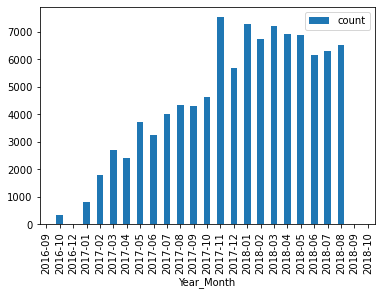

In [22]:
# Purchase dates over time
fig = plt.figure(figsize =(10, 10))

orders_per_month = orders_df.copy()
orders_per_month['Year_Month'] = orders_per_month['order_purchase_timestamp'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_purchases = orders_per_month.groupby('Year_Month').size().to_frame("count").reset_index()

grouped_purchases.plot(kind = 'bar', x = 'Year_Month', y = 'count')

plt.show()

It looks like the orders in 2016 and after August of 2018 are very few so I may be dropping them and keeping 2017 - August of 2018.  November orders are very high and then January and March.  That may be in preparing for Christmas and after Christmas money spending.

In [23]:
grouped_purchases.value_counts().sort_index(ascending=True)

Year_Month  count
2016-09     4        1
2016-10     324      1
2016-12     1        1
2017-01     800      1
2017-02     1780     1
2017-03     2682     1
2017-04     2404     1
2017-05     3700     1
2017-06     3245     1
2017-07     4026     1
2017-08     4331     1
2017-09     4285     1
2017-10     4631     1
2017-11     7544     1
2017-12     5673     1
2018-01     7269     1
2018-02     6728     1
2018-03     7211     1
2018-04     6939     1
2018-05     6873     1
2018-06     6167     1
2018-07     6292     1
2018-08     6512     1
2018-09     16       1
2018-10     4        1
dtype: int64

In [24]:
orders_df.shape

(99441, 8)

In [25]:
# Delete orders with dates before Jan, 2017 and after Aug, 2018
orders_filtered_df = orders_df[~(orders_df['order_purchase_timestamp'] < '2017-01-01')]
orders_filtered_df = orders_filtered_df[~(orders_filtered_df['order_purchase_timestamp'] > '2018-08-31')]

In [26]:
orders_filtered_df.shape

(99091, 8)

### Order Items

In [27]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [28]:
orderitems_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Since we are looking at a higher level I will combine order items to 1 row combining the number of items in the order and sum the price and freight.  I will drop the product ID and order item id as they are no longer needed along with the shipping limit date and seller id

In [30]:
# Group rows by order id and get totals
total_order_items_df = orderitems_df.groupby('order_id').aggregate({'price': sum, 'freight_value': sum, 'order_item_id': 'count'}).reset_index()
total_order_items_df.rename(columns={'order_item_id': 'num_items'}, inplace = True)
total_order_items_df.head()

,order_id,price,freight_value,num_items
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1


### Order Payments

In [31]:
orderpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [32]:
orderpay_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [33]:
orderpay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [34]:
orderpay_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


The maximum of the columns is very high compared to the mean.

### Order Reviews

In [35]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [36]:
orderreviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [37]:
orderreviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [38]:
orderreviews_df['order_id'].value_counts().loc[lambda x : x > 1]

c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
c27cd942c2a926d25153090afa106ceb    2
74b7f4373a78df8c16862d9d0875c5b4    2
8c6a3fab1ed272b02f23bb7dc9061d9a    2
f2f99bdf2e5cc73abc5e135a2ab1767e    2
5f7252bf13701d879f6fc28e72b71a9b    2
Name: order_id, Length: 547, dtype: int64

In [39]:
orderreviews_df['order_id'].value_counts().loc[lambda x : x > 1].count()

547

There are duplicate reviews for the same order id. They only make up for a very small number of the orders.

In [40]:
orderreviews_df[orderreviews_df['order_id'] == '03c939fd7fd3b38f8485a0f95798f1f6']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8273,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
51527,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
69438,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32


The comments are different as well as the scores and and creation dates. It may be the person changing their mind after a time. This should be looked into if the scores are trending up or down.

### Products

In [41]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Since we got rid of individual items and summed them into one order we do not need the products or the category names datasets

### Sellers

In [42]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


This dataset has no features that will be of use to this study, this dataset will not get merged into the final one.

## Merge datasets for further analysis

In [43]:
# First lets look at the Orders together
olist_df = orders_filtered_df.merge(orderreviews_df, on = 'order_id')
olist_df = olist_df.merge(total_order_items_df, on = 'order_id')
olist_df = olist_df.merge(orderpay_df, on = 'order_id')
olist_df = olist_df.merge(customers_df, on = 'customer_id')

In [44]:
olist_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,freight_value,num_items,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,1,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,1,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,1,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,22.76,1,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,19.22,1,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


### Check empty values

In [45]:
olist_df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1016
order_delivered_customer_date     2176
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             90637
review_comment_message           60523
review_creation_date                 0
review_answer_timestamp              0
price                                0
freight_value                        0
num_items                            0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
dtype: int64

### Review Scores

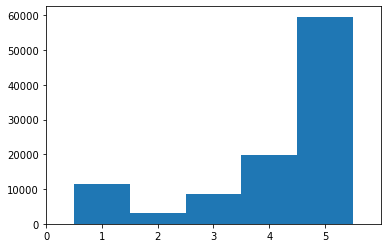

In [46]:
# Histogram of review scores
fig, ax = plt.subplots()

bins = np.arange(7) - 0.5
ax.hist(olist_df['review_score'], bins = bins)
plt.xticks(range(6))
plt.xlim([0, 6])

plt.show()

Most of the scores are a 5.

### Create dataframe for Visualizations

In [47]:
visuals_df = olist_df.drop_duplicates('order_id')
visuals_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,freight_value,num_items,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,1,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,22.76,1,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,19.22,1,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,27.20,1,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,8.72,1,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### Orders

### Number of Orders per Month

In [48]:
visuals_df['Month'] = visuals_df['order_purchase_timestamp'].dt.month_name(locale = 'English')
visuals_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21172\3493268387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visuals_df['Month'] = visuals_df['order_purchase_timestamp'].dt.month_name(locale = 'English')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,num_items,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,1,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,1,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,1,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,1,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February


In [49]:
orders_month = visuals_df.groupby('Month')['order_id'] \
    .count().reset_index(name = 'count') \
    .sort_values(['count'], ascending = False)

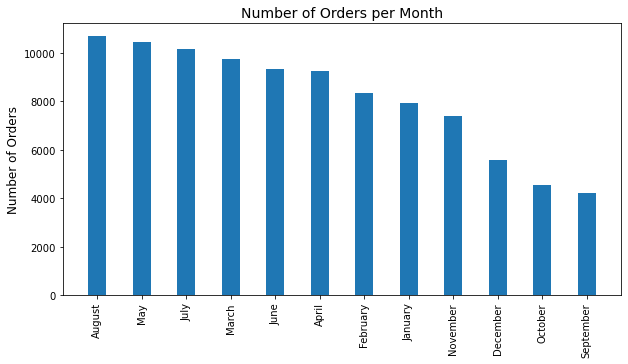

In [50]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(orders_month['Month'], orders_month['count'], width = 0.4)
 
plt.xlabel("")
plt.xticks(orders_month['Month'], orders_month['Month'], rotation='vertical')
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Month", fontsize = 14)

plt.show()

### Orders per Day of the Week

In [58]:
visuals_df['DOW'] = visuals_df['order_purchase_timestamp'].dt.day_name(locale = 'English')
visuals_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21172\3771012624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visuals_df['DOW'] = visuals_df['order_purchase_timestamp'].dt.day_name(locale = 'English')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Month,DOW
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,Wednesday
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November,Saturday
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February,Tuesday


In [59]:
orders_day = visuals_df.groupby('DOW')['order_id'] \
    .count().reset_index(name = 'count') \
    .sort_values(['count'], ascending = False)

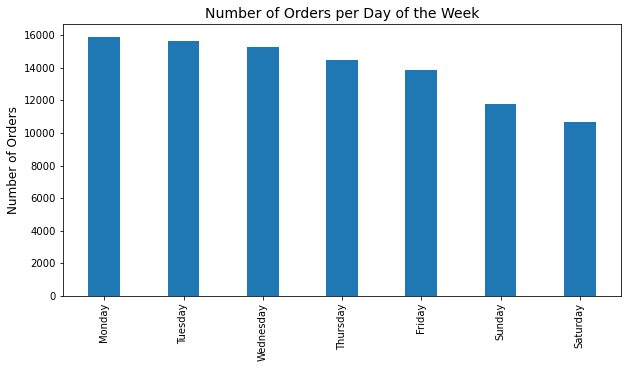

In [60]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(orders_day['DOW'], orders_day['count'], width = 0.4)
 
plt.xlabel("")
plt.xticks(orders_day['DOW'], orders_day['DOW'], rotation='vertical')
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Day of the Week", fontsize = 14)

plt.show()

### Orders per Time of day

In [65]:
# Bin Time of Day into 4 bins:
# Morning: 6am - 11am
# Afternoon: 11am - 4pm
# Night: 4pm - 11pm
# Overnight: 11pm - 6am

def bin_times(x):
    if (x >= 6) and (x < 11):
        return 'Morning'
    elif (x >= 11) and (x < 16 ):
        return 'Afternoon'
    elif (x >= 16) and (x < 23) :
        return 'Night'
    elif (x < 6):
        return 'Overnight'
    elif (x >= 23):
        return 'Overnight'

In [66]:
visuals_df['time_of_day'] = visuals_df['order_purchase_timestamp'].dt.hour.apply(bin_times)
visuals_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21172\2859584571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visuals_df['time_of_day'] = visuals_df['order_purchase_timestamp'].dt.hour.apply(bin_times)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Month,DOW,time_of_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,Monday,Morning
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,Tuesday,Night
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,Wednesday,Morning
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November,Saturday,Night
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February,Tuesday,Night


In [67]:
orders_time = visuals_df.groupby('time_of_day')['order_id'] \
    .count().reset_index(name = 'count') \
    .sort_values(['count'], ascending = False)

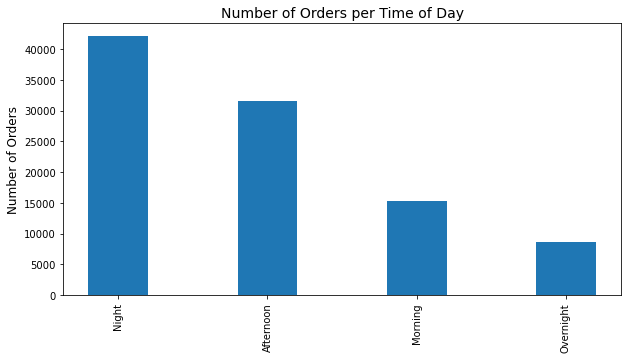

In [68]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(orders_time['time_of_day'], orders_time['count'], width = 0.4)
 
plt.xlabel("")
plt.xticks(orders_time['time_of_day'], orders_time['time_of_day'], rotation='vertical')
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Time of Day", fontsize = 14)

plt.show()

### Number of Orders per State

In [51]:
order_count_per_state = olist_df.groupby('customer_state')['order_purchase_timestamp'] \
    .count().reset_index(name = 'count') \
    .sort_values(['count'], ascending = False)

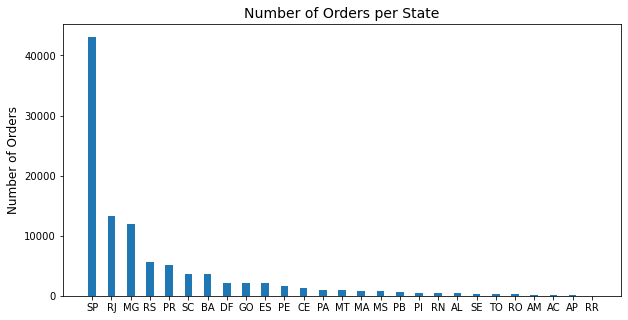

In [52]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(order_count_per_state['customer_state'], order_count_per_state['count'], width = 0.4)
 
plt.xlabel("")
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per State", fontsize = 14)

plt.show()

Sao Paulo has the most orders by far of all the states. Rio de Janeiro is second but by more than half the amount.

### Purchase Amount per State

In [53]:
order_amt_per_state = olist_df.groupby('customer_state')['payment_value'] \
    .sum().reset_index(name = 'sum') \
    .sort_values(['sum'], ascending = False)

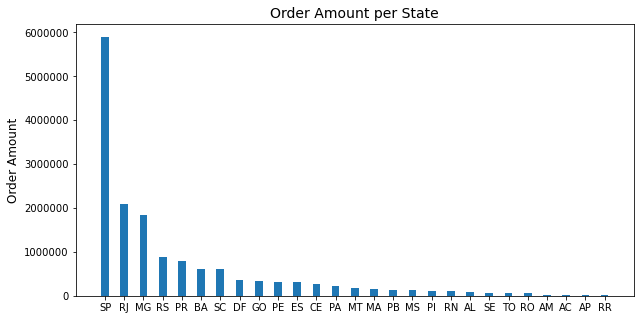

In [54]:
fig, ax = plt.subplots(figsize = (10, 5))
 
ax.bar(order_amt_per_state['customer_state'], order_amt_per_state['sum'], width = 0.4)
ax.ticklabel_format(style = 'plain', axis = 'y')
 
plt.xlabel("")
plt.ylabel("Order Amount", fontsize = 12)
plt.title("Order Amount per State", fontsize = 14)

plt.show()

Sao Paulo has the highest purchase amount by far of all the states. Rio de Janeiro is second but by more than half the amount.

### Freight

#### Freight per State

#### Days to Deliver (Purchase date to Delivery Date)

#### Days to Deliver per State (Purchase date to Delivery Date)

#### Delivery difference (Estimated vs Actual Delivery)

#### Delivery difference per State (Estimated vs Actual Delivery)

### Review scores per order status

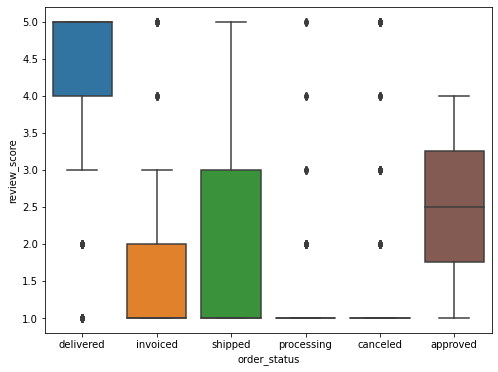

In [55]:
fig = plt.subplots(figsize = (8, 6))
sns.boxplot(x = 'order_status', y = 'review_score', data = olist_df )
plt.show()

The review scores for delivered are mostly between 3 and 5. Invoiced and Shipped are lower on the scale and approved is also lower.

In [56]:
# Get difference in days for delivery dates based on purchase dates
olist_df['purchase_delivery_days_diff'] = (olist_df['order_delivered_customer_date'] - 
                                           olist_df['order_purchase_timestamp']).dt.days

olist_df['estimated_delivery_days_diff'] = (olist_df['order_delivered_customer_date'] -
                                            olist_df['order_estimated_delivery_date']).dt.days

In [57]:
# Top customers in amount spent and number of orders
olist_df.groupby('customer_id').agg(total_price = ('price', 'sum'), 
                                    total_orders = ('customer_id', 'count'),
                                    avg_review_score = ('review_score', 'mean'),
                                    avg_purch_delivery_diff = ('purchase_delivery_days_diff', 'mean'),
                                    avg_est_delivery_diff = ('estimated_delivery_days_diff', 'mean')
                                   ).sort_values(by = 'total_price', ascending = False)

,total_price,total_orders,avg_review_score,avg_purch_delivery_diff,avg_est_delivery_diff
customer_id,,,,,
1617b1357756262bfa56ab541c47bc16,13440.00,1,1.0,18.0,-6.0
9af2372a1e49340278e7c1ef8d749f34,11383.95,29,1.0,NaN,NaN
de832e8dbb1f588a47013e53feaa67cc,10856.10,15,5.0,3.0,-8.0
63b964e79dee32a3587651701a2b8dbf,9888.00,12,5.0,14.0,-9.0
6f241d5bbb142b6f764387c8c270645a,9520.14,7,5.0,10.0,-16.0
...,...,...,...,...,...
5ac9fcc9259df95cf14d27238b112148,2.99,1,5.0,14.0,-10.0
d2c63ad286e3ca9dd69218008d61ff81,2.90,1,5.0,11.0,-28.0
184e8e8e48937145eb96c721ef1f0747,2.29,1,5.0,4.0,-8.0


Its interesting that the top two customers in amount spent and give very poor review scores. The top customer spent the most with only 1 order and got their delivery 6 days before the estimated delivery date but it took 18 days to get there. The next highest customer had 29 orders but delivery dates so I'm wondering about the legitimacy of their orders.